# Загрузим все необходимые библиотеки и наш датафрейм

In [577]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split # Загружаем специальный инструмент для разбивки: 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # инструмент для создания и обучения модели  
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics # инструменты для оценки точности модели  

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\user\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [578]:
df = pd.read_csv("main_task.csv")
df_kaggle = pd.read_csv('kaggle_task.csv')

In [579]:
#посмотрим на наш датасет

In [580]:
df.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [581]:
df.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
23337,id_99,Luxembourg,"['Italian', 'Mediterranean']",100.0,4.0,$$ - $$$,40.0,"[['Great decor', 'Successful relooking good fo...",/Restaurant_Review-g190356-d12813882-Reviews-S...,d12813882
31013,id_839,Stockholm,"['Chinese', 'Asian']",840.0,4.0,$$ - $$$,28.0,"[['genuine chinese food', 'Nice food'], ['11/0...",/Restaurant_Review-g189852-d7238704-Reviews-Li...,d7238704
11741,id_1558,Edinburgh,['Fast Food'],1563.0,3.5,$,38.0,"[['Quick pitstop', 'One Man Show'], ['10/03/20...",/Restaurant_Review-g186525-d2545598-Reviews-Su...,d2545598
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
16333,id_6226,Berlin,NaN,6228.0,3.5,NaN,5.0,"[[], []]",/Restaurant_Review-g187323-d5518525-Reviews-Pi...,d5518525


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [583]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


# Определим функцию, которая будет принимат на вход датафрейм, и выдавать значения метрики

In [584]:
def model_MAE (df, random_state=None):
    # Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
    X = df.drop('Rating', axis = 1)  
    y = df['Rating']  

    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Создаём модель  
    regr = RandomForestRegressor(n_estimators=100)  
  
    # Обучаем модель на тестовом наборе данных  
    regr.fit(X_train, y_train)  
  
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
    y_pred = regr.predict(X_test)

    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
    print('MAE reg:', metrics.mean_absolute_error(y_test, y_pred))

In [585]:
#запустим нашу модель на "сыром" датасете, оставив только колонки "Number of Reviews" и "Ranking" 

In [586]:
cols_to_drop = ['Restaurant_id', 'City', 'Cuisine Style',
       'Price Range', 'Reviews', 'URL_TA', 'ID_TA']
model_MAE(df.drop(columns=cols_to_drop).dropna(), random_state=300)

MAE reg: 0.42697555169959067


In [587]:
#продолжим улучшать значение метрики в том числе и с помощью future engeneering

In [588]:
#начнем со столбца City
df.City.value_counts()


London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [589]:
# создадим словарь c туристическими индексами городов по статистике за 2018 год от Euromonitor и Mastercard
touristic = {'London': 19333, 'Paris': 17560 , 'Madrid': 5440, 'Barcelona': 6714, 'Berlin': 5959, 'Milan': 6481, 'Rome': 10065, 'Prague': 8948, 'Lisbon': 3539, 'Vienna': 6410, 'Amsterdam': 8354 , 'Brussels': 3942, 'Hamburg': 1450, 'Munich': 4066, 'Lyon': None, 'Stockholm': 2604,
              'Budapest': 3822, 'Warsaw': 2850, 'Dublin': 5213, 'Copenhagen': 3069, 'Athens': 5728, 'Edinburgh': 1660, 'Zurich': 2240, 'Oporto': 2341, 'Geneva': 1150, 'Krakow': 2732, 'Oslo': None, 'Helsinki': None, 'Bratislava': None, 'Luxembourg': None, 'Ljubljana': None}
df['touristic'] = df.City.replace(to_replace=touristic)
df_kaggle['touristic'] = df_kaggle.City.replace(to_replace=touristic)


In [590]:
#проверим как это сработало
cols_to_drop = ['Restaurant_id', 'City', 'Cuisine Style',
       'Price Range', 'Reviews', 'URL_TA', 'ID_TA']
model_MAE(df.drop(columns=cols_to_drop).dropna(), random_state=300)

MAE reg: 0.22724622887603493


In [591]:
#продолжим со столбцом Cuisine Style
type(df['Cuisine Style'][0])
#это строка, нужно вычленить список кухонь

str

In [592]:
#создадим признак, куда разместим список кухонь для каждого рсторана
df['Cuisine Style List'] = df['Cuisine Style'].str.findall(r"'([\w\s]*)'")

df_kaggle['Cuisine Style List'] = df_kaggle['Cuisine Style'].str.findall(r"'([\w\s]*)'")

In [593]:
#создадим признак с количеством кухонь
df['Numbers of Cuisines'] = df['Cuisine Style List'].str.len()

df_kaggle['Numbers of Cuisines'] = df_kaggle['Cuisine Style List'].str.len()


In [594]:
df['Numbers of Cuisines'].fillna(df['Numbers of Cuisines'].mean())

df_kaggle['Numbers of Cuisines'].fillna(df_kaggle['Numbers of Cuisines'].mean())



0       2.000000
1       5.000000
2       1.000000
3       5.000000
4       6.000000
          ...   
9995    4.000000
9996    4.000000
9997    3.126999
9998    1.000000
9999    3.126999
Name: Numbers of Cuisines, Length: 10000, dtype: float64

In [595]:
#проверим как влияет новый признак на метрику
cols_to_drop = ['Restaurant_id', 'City', 'Cuisine Style',
       'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine Style List']
model_MAE(df.drop(columns=cols_to_drop).dropna(), random_state=300)

MAE reg: 0.2212724142877636


In [596]:
#создадим список всех кухонь

In [597]:
cuisines_list = []
for rest in df['Cuisine Style List'].dropna():
    for i in range(len(rest)):
        cuisines_list.append(rest[i])
cuisine_list = pd.Series(cuisines_list).value_counts()
cuisine_list

Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
Vegan Options           4486
                       ...  
Xinjiang                   1
Latvian                    1
Burmese                    1
Yunnan                     1
Salvadoran                 1
Length: 124, dtype: int64

In [598]:
#если количество кухонь сильно не повлияло на результат, то проверим гипотезу о том, 
#что наличие той или иной кухни в ресторане влияет на результат
#допустим что 20% всех кухонь дают 80% от всего результата
#создадим список популярных кухонь

In [599]:
len(cuisine_list)*0.2 


24.8

In [600]:
#отберем первые 25 кухонь из списка
cuisine_list_top = cuisine_list.index[0:25]
#создадим признаки из этого списка кухонь
cuisine_list_top
        

Index(['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian',
       'Vegan Options', 'Gluten Free Options', 'Bar', 'French', 'Asian',
       'Pizza', 'Spanish', 'Pub', 'Cafe', 'Fast Food', 'British',
       'International', 'Seafood', 'Japanese', 'Central European', 'American',
       'Sushi', 'Chinese', 'Portuguese', 'Indian', 'Middle Eastern'],
      dtype='object')

In [601]:
#создадим столбцы с именами списка топ кухоньб если в ресторане есть кухня из этого списка, то в соответствующую ячейку поставим 1

In [602]:
df = pd.concat([df, pd.DataFrame(columns=cuisine_list_top)], axis=0)
df[cuisine_list_top] = df[cuisine_list_top].fillna(0)

df_kaggle = pd.concat([df_kaggle, pd.DataFrame(columns=cuisine_list_top)], axis=0)
df_kaggle[cuisine_list_top] = df_kaggle[cuisine_list_top].fillna(0)

In [603]:
df['Cuisine Style List'] = df['Cuisine Style List'].fillna('m')
df_kaggle['Cuisine Style List'] = df_kaggle['Cuisine Style List'].fillna('m')

def func(x):
    if isinstance(x['Cuisine Style List'], list):
        for c in x['Cuisine Style List']:
            if c in cuisine_list_top:
                x[c] = 1.
       
    return x


In [604]:
df = df.apply(lambda x: func(x), axis=1)
df_kaggle = df_kaggle.apply(lambda x: func(x), axis=1)

In [605]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        10000 non-null  object 
 1   City                 10000 non-null  object 
 2   Cuisine Style        7693 non-null   object 
 3   Ranking              10000 non-null  float64
 4   Price Range          6525 non-null   object 
 5   Number of Reviews    9343 non-null   float64
 6   Reviews              9998 non-null   object 
 7   URL_TA               10000 non-null  object 
 8   ID_TA                10000 non-null  object 
 9   touristic            9393 non-null   float64
 10  Cuisine Style List   10000 non-null  object 
 11  Numbers of Cuisines  7693 non-null   float64
 12  Vegetarian Friendly  10000 non-null  float64
 13  European             10000 non-null  float64
 14  Mediterranean        10000 non-null  float64
 15  Italian              10000 non-null  

In [606]:
#проверим как влияют новые признаки на метрику
cols_to_drop = ['Restaurant_id', 'City', 'Cuisine Style',
       'Price Range', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine Style List']
model_MAE(df.drop(columns=cols_to_drop).dropna(), random_state=300)

MAE reg: 0.22360565198680246


In [607]:
#посмотрим на переменную Price Range
df['Price Range'].value_counts(dropna = False)


$$ - $$$    18412
NaN         13886
$            6279
$$$$         1423
Name: Price Range, dtype: int64

In [608]:
df['Price Range'] = df['Price Range'].fillna(0.)
df_kaggle['Price Range'] = df_kaggle['Price Range'].fillna(0.)

range_list = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

In [609]:
df['Price Range'] = df['Price Range'].replace(to_replace=range_list)
df_kaggle['Price Range'] = df_kaggle['Price Range'].replace(to_replace=range_list)

df_kaggle['Price Range'].value_counts(dropna = False)

2.0    4629
0.0    3475
1.0    1537
3.0     359
Name: Price Range, dtype: int64

In [610]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        10000 non-null  object 
 1   City                 10000 non-null  object 
 2   Cuisine Style        7693 non-null   object 
 3   Ranking              10000 non-null  float64
 4   Price Range          10000 non-null  float64
 5   Number of Reviews    9343 non-null   float64
 6   Reviews              9998 non-null   object 
 7   URL_TA               10000 non-null  object 
 8   ID_TA                10000 non-null  object 
 9   touristic            9393 non-null   float64
 10  Cuisine Style List   10000 non-null  object 
 11  Numbers of Cuisines  7693 non-null   float64
 12  Vegetarian Friendly  10000 non-null  float64
 13  European             10000 non-null  float64
 14  Mediterranean        10000 non-null  float64
 15  Italian              10000 non-null  

In [611]:
#проверим значение метрики
cols_to_drop = ['Restaurant_id', 'City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine Style List']
model_MAE(df.drop(columns=cols_to_drop).dropna(), random_state=300)

MAE reg: 0.22001075885812654


In [612]:
#поработаем с отзывами
df['Reviews'][0]

"[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]"

In [613]:
#видно что в этом поле два отзыва и 2 даты

In [614]:
type(df['Reviews'][0])

str

In [615]:
#как и в случае с кухнями  - тут строка,попробуем вычленить даты

In [616]:
df['Reviews_date1'] = df['Reviews'].str.findall(r"'([\d/]*)'").str[0]
df['Reviews_date2'] = df['Reviews'].str.findall(r"'([\d/]*)'").str[1]

df_kaggle['Reviews_date1'] = df_kaggle['Reviews'].str.findall(r"'([\d/]*)'").str[0]
df_kaggle['Reviews_date2'] = df_kaggle['Reviews'].str.findall(r"'([\d/]*)'").str[1]

In [617]:
#так просто в формат даты не перевести, вытащим данные нужного вида (длина даты как минимум 10 символов)

In [618]:
#остальное заполним пропусками
df.loc[(df.Reviews_date1.str.len() < 10) | (df.Reviews_date1.isna()), 'Reviews_date1'] = None
df.loc[(df.Reviews_date2.str.len() < 10) | (df.Reviews_date2.isna()), 'Reviews_date2'] = None

df_kaggle.loc[(df_kaggle.Reviews_date1.str.len() < 10) | (df_kaggle.Reviews_date1.isna()), 'Reviews_date1'] = None
df_kaggle.loc[(df_kaggle.Reviews_date2.str.len() < 10) | (df_kaggle.Reviews_date2.isna()), 'Reviews_date2'] = None

In [619]:
#переведем в формат даты
df['Reviews_date1'] = pd.to_datetime(df['Reviews_date1'])
df['Reviews_date2'] = pd.to_datetime(df['Reviews_date2'])

df_kaggle['Reviews_date1'] = pd.to_datetime(df_kaggle['Reviews_date1'])
df_kaggle['Reviews_date2'] = pd.to_datetime(df_kaggle['Reviews_date2'])



In [620]:
#попробуем высчитать разницу по времени между отзывами
df['Reviews_date_diff'] = abs(df['Reviews_date1'] - df['Reviews_date2']).dt.days
df_kaggle['Reviews_date_diff'] = abs(df_kaggle['Reviews_date1'] - df_kaggle['Reviews_date2']).dt.days


#добавим признак, который показывает насколько давно был последний отзыв
df['last_review_date1'] = abs(df['Reviews_date1'] - df['Reviews_date1'].dropna().max()).dt.days
df['last_review_date2'] = abs(df['Reviews_date2'] - df['Reviews_date2'].dropna().max()).dt.days

df_kaggle['last_review_date1'] = abs(df_kaggle['Reviews_date1'] - df_kaggle['Reviews_date1'].dropna().max()).dt.days
df_kaggle['last_review_date2'] = abs(df_kaggle['Reviews_date2'] - df_kaggle['Reviews_date2'].dropna().max()).dt.days


In [632]:
#заполним пропуски средним
df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())
df['touristic'] = df['touristic'].fillna(df['touristic'].mean())
df['Reviews_date_diff'] = df['Reviews_date_diff'].fillna(df['Reviews_date_diff'].mean())
df['last_review_date1'] = df['last_review_date1'].fillna(df['last_review_date1'].mean())
df['last_review_date2'] = df['last_review_date2'].fillna(df['last_review_date2'].mean())
df['Numbers of Cuisines'] = df['Numbers of Cuisines'].fillna(df['Numbers of Cuisines'].mean())




In [633]:
df_kaggle['Number of Reviews'] = df_kaggle['Number of Reviews'].fillna(df_kaggle['Number of Reviews'].mean())
df_kaggle['touristic'] = df_kaggle['touristic'].fillna(df_kaggle['touristic'].mean())
df_kaggle['Reviews_date_diff'] = df_kaggle['Reviews_date_diff'].fillna(df_kaggle['Reviews_date_diff'].mean())
df_kaggle['last_review_date1'] = df_kaggle['last_review_date1'].fillna(df_kaggle['last_review_date1'].mean())
df_kaggle['last_review_date2'] = df_kaggle['last_review_date2'].fillna(df_kaggle['last_review_date2'].mean())
df_kaggle['Numbers of Cuisines'] = df_kaggle['Numbers of Cuisines'].fillna(df_kaggle['Numbers of Cuisines'].mean())

In [634]:
#проверим значение метрики
cols_to_drop = ['Restaurant_id', 'City', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine Style List', 'Reviews_date1', 'Reviews_date2']
model_MAE(df.drop(columns=cols_to_drop).dropna(), random_state=300)


KeyError: "['City' 'Cuisine Style' 'Reviews' 'URL_TA' 'ID_TA' 'Cuisine Style List'\n 'Reviews_date1' 'Reviews_date2'] not found in axis"

In [504]:
#заполним пропуски и удалим ненужные колонки
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant_id        10000 non-null  object        
 1   City                 10000 non-null  object        
 2   Cuisine Style        7693 non-null   object        
 3   Ranking              10000 non-null  float64       
 4   Price Range          10000 non-null  float64       
 5   Number of Reviews    10000 non-null  float64       
 6   Reviews              9998 non-null   object        
 7   URL_TA               10000 non-null  object        
 8   ID_TA                10000 non-null  object        
 9   touristic            10000 non-null  float64       
 10  Cuisine Style List   10000 non-null  object        
 11  Numbers of Cuisines  10000 non-null  float64       
 12  Vegetarian Friendly  10000 non-null  float64       
 13  European             10000 non-n

In [629]:
df.drop(columns=['City', 'Cuisine Style', 'Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine Style List', 'Reviews_date1', 'Reviews_date2'], inplace=True)
df_kaggle.drop(columns=['City', 'Cuisine Style', 'Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'Cuisine Style List', 'Reviews_date1', 'Reviews_date2'], inplace=True)


KeyError: "['City' 'Cuisine Style' 'Reviews' 'Reviews' 'URL_TA' 'ID_TA'\n 'Cuisine Style List' 'Reviews_date1' 'Reviews_date2'] not found in axis"

In [635]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant_id        10000 non-null  object 
 1   Ranking              10000 non-null  float64
 2   Price Range          10000 non-null  float64
 3   Number of Reviews    10000 non-null  float64
 4   touristic            10000 non-null  float64
 5   Numbers of Cuisines  10000 non-null  float64
 6   Vegetarian Friendly  10000 non-null  float64
 7   European             10000 non-null  float64
 8   Mediterranean        10000 non-null  float64
 9   Italian              10000 non-null  float64
 10  Vegan Options        10000 non-null  float64
 11  Gluten Free Options  10000 non-null  float64
 12  Bar                  10000 non-null  float64
 13  French               10000 non-null  float64
 14  Asian                10000 non-null  float64
 15  Pizza                10000 non-null  

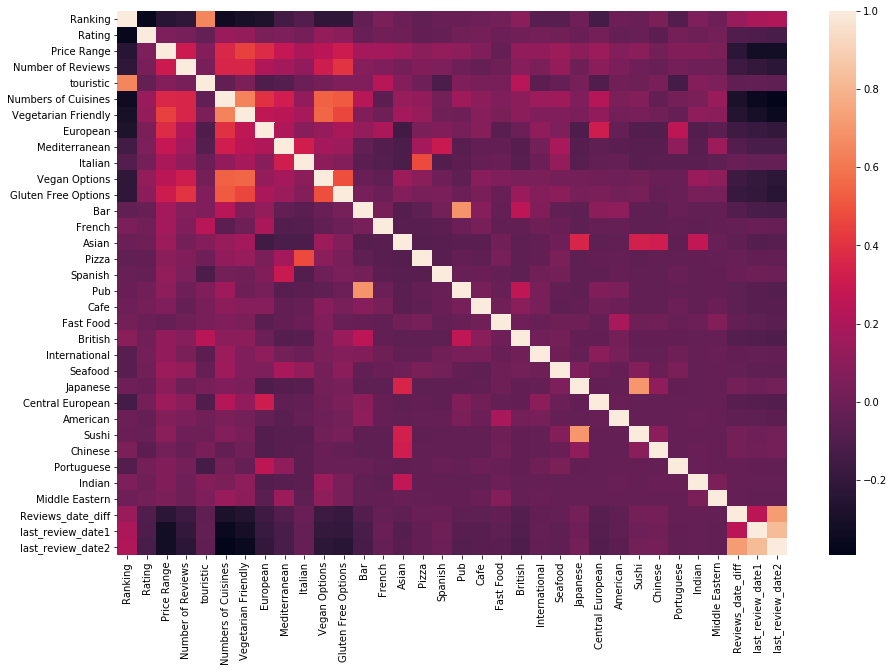

In [627]:
#посмотрим корреляцию признаков
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.corr(),)

In [ ]:
#можно увидеть некоторые интересные закономерности:
#количество кухонь в ресторане коррелирует с количеством отзывов
#веганские места наиболее популярные
#бары часто бывают британскими)))

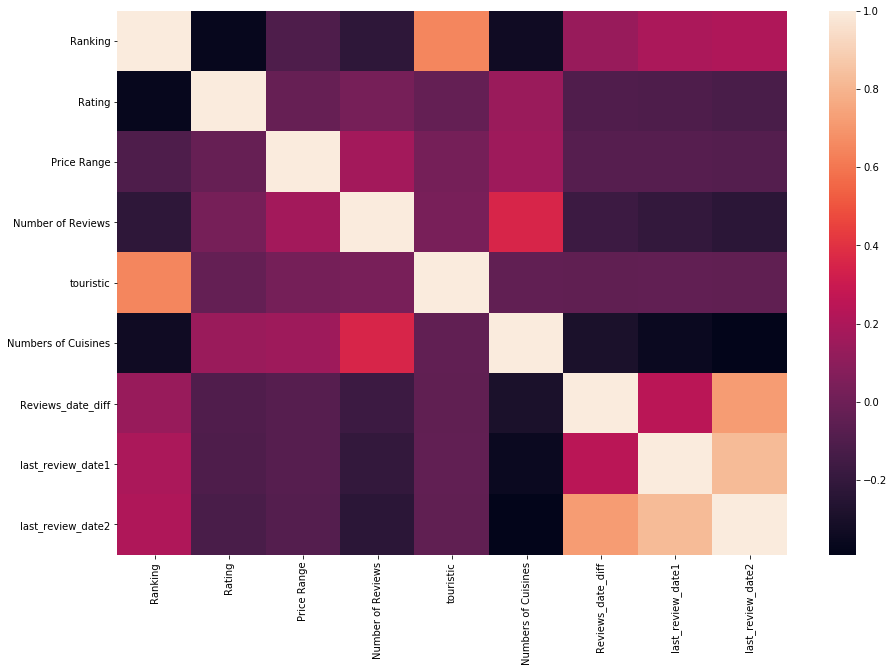

In [456]:
#теперь без косвенных переменных
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df.drop(['Vegetarian Friendly', 'European', 'Mediterranean', 'Italian',
       'Vegan Options', 'Gluten Free Options', 'Bar', 'French', 'Asian',
       'Pizza', 'Spanish', 'Pub', 'Cafe', 'Fast Food', 'British',
       'International', 'Seafood', 'Japanese', 'Central European', 'American',
       'Sushi', 'Chinese', 'Portuguese', 'Indian', 'Middle Eastern'], axis=1).corr(),)

In [636]:
random_state = 300
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, random_state=random_state, n_jobs=-1)
# Обучаем модель на тестовом наборе данных
regr.fit(X, y)
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=300, verbose=0, warm_start=False)

In [644]:
y_pred = regr.predict(df_kaggle.drop(['Restaurant_id'], axis = 1))


In [647]:
sub_df = df_kaggle[['Restaurant_id']]
sub_df['Rating'] = np.round(y_pred * 2) / 2

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [648]:
sub_df.to_csv('submit.csv', index=0)